- Seq2Seq modeling
- Translating between languages using Seq2Seq modeling
- Let's pay some attention
- Transformers
- BERT

#### Seq2Seq modeling

- Applications based on Natural Language Processing (NLP) have witnessed a tremendous rise in the last few years. New use cases are coming along every day and in order to keep pace with the ever-evolving demand, the need of the hour is to research, innovate, and build efficient solutions for solving the complex problems we face. Innovation in the field of NLP over the years has made it possible to solve some of the most challenging problems, such as language translation and building chatbots, among others.
<br><br><br>

- we will take a look at some of the recent advancements in the field of NLP. We will begin by developing an understanding of Sequence-to-Sequence (Seq2Seq) models and discuss encoders and decoders in the process. We will use this new knowledge to build a French-to-English translator using Seq2Seq modeling. After that, we will have a look at the attention mechanism, one of the key recent developments. The attention mechanism has not only improved the inferencing abilities of existing architectures but has also paved the way for the development of other amazingly efficient architectures such as Transformers and Bidirectional Encoder Representations from Transformers (BERT), which we will look at toward the end of this chapter.

### Seq2Seq modeling

- Before we begin with Seq2Seqmodeling, I would like to share an anecdote that I witnessed at Bengaluru Airport in India. A traveler from China was trying to order a meal at one of the airport restaurants and the butler was unable to comprehend Mandarin. An onlooker stepped in and used Google Translate to convert the English being spoken by the store owner into Mandarin and vice versa. Seq2Seq modeling has helped build applications such as Google Translate, which made the conversation between these folks possible.<br>

- When we try to build chatbots or language translating systems, we essentially try to convert a sequence of text of some arbitrary length into another sequence of text of some unknown length. For example, the same chatbot might respond with one word or multiple words depending on the conversational prompts coming from the other party involved in the conversation. We do not always respond with text of the same length. We saw this as one of the many-to-many variants of the RNN architecture in Chapter 10, Capturing Temporal Relationships in Text. This architecture is referred to as Seq2Seq modeling, where we try to convert one sequence into another.

Let's consider the example of language translation.

The English sentence how are you doing? is written as como estas? in Spanish. These two sentences are of different lengths. Let's think of another example: can we do this? in English is represented as podemos hacer esto? in Spanish. Even though both English sentences have four words in them, their Spanish counterparts are of differing lengths. When building such systems, we try to map an input sequence to an output sequence that can be of varying lengths.<br>

Okay. Now that we understand what Seq2Seq modeling is, how do we do it? We use two building blocks, called Encoders and Decoders and shown in the following diagram, to build our Seq2Seq modeling systems:

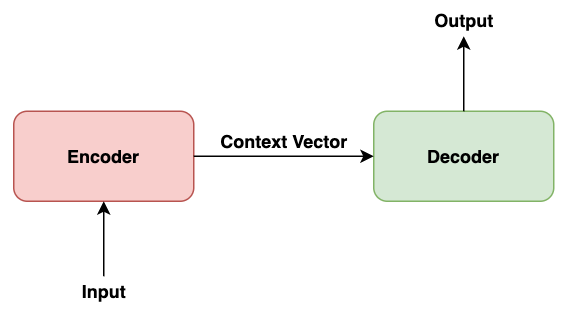

In [2]:
from IPython.display import Image
Image(filename='./images/dec.png',height=400,width=400) 

These encoders and decoders can be built using Long Short Term Memory (LSTM) networks, Gated Recurrent Units (GRU), and so on. Let's take a deep dive and understand how these encoders and decoders enable us to build these systems.

These encoders and decoders can be built using Long Short Term Memory (LSTM) networks, Gated Recurrent Units (GRU), and so on. Let's take a deep dive and understand how these encoders and decoders enable us to build these systems.

#### Encoders
The encoder is the first component in the encoder-decoder architecture. The input data is fed to the encoder and it builds a representation of the input data. This low-dimensional representation of the input data is referred to as the context vector. Some literature also refers to it as the thought vector. The context vector tries to capture the meaning in the input data. Essentially, it tries to build an embedding for the input data.

The encoder can be built using RNNs, LSTMs, GRUs, or bidirectional RNNs, among others. We saw that RNN-based architectures hold the context of the inputs that they saw in the hidden state. Hence, the last hidden state will hold the context of the entire sentence. The hidden state from the last timestep is what we want. It is our context vector since it has seen all the input and has maintained the context of all the input words.

Let's think of a natural language translation task where we want to convert sentences from English into French. As an example, let's pick the sentence, Learning Natural Language Processing and see what the encoder does to convert it into its French equivalent:

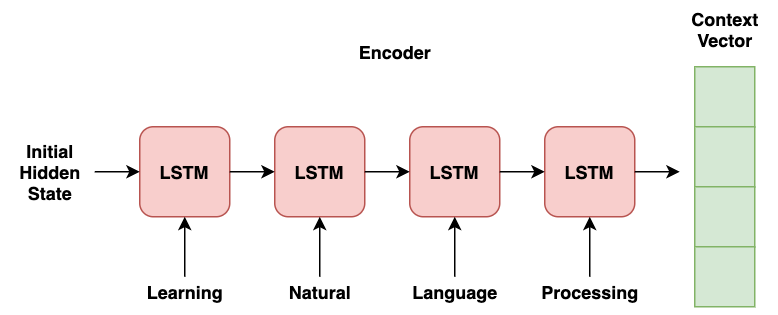

In [3]:
from IPython.display import Image
Image(filename='./images/enc.png',height=400,width=400) 

The preceding diagram illustrates an encoder built using LSTM that develops a context vector for the English sentence, Learning Natural Language Processing. The output from the encoder is the context vector, which contains two parts:

The hidden state from the last timestep of the encoder
The memory state of the LSTM for the input sentence
The return_state parameter in Keras' LSTM implementation allows us to include the last hidden state in our output.
Now that we have successfully built a context vector of our input sentence, the next step is to decode this context vector and build our French sentence using it. Let's do that next.

### Decoders
We got an embedding of our input sentence, Learning Natural Language Processing, using the encoder. The next part is to decode this context vector and build its French representation, Apprendre le traitement du langage naturel. The following diagram shows how a decoder, built using LSTM, gets trained to do this:

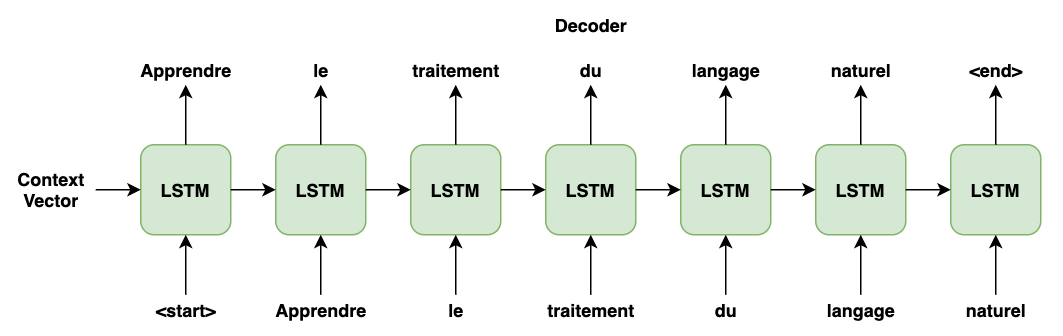

In [4]:
from IPython.display import Image
Image(filename='./images/decoder.png',height=400,width=400) 

Let's understand its working in depth next.

Up to now, we have seen that the initial hidden state for any RNN-based architecture is a randomly initialized vector. However, with decoders, the input is the context vector that we received as output from the encoder.

Okay, we have now understood that the initial hidden state should not be a randomly initialized vector, but rather, the context vector. However, we still don't understand what the input to the decoder should be.

The input to the decoder at the first timestep is a token that indicates the start of the sentence,<start>. Using this <start> token, the decoder now has the task of learning to predict the first token of the target sentence. However, the working of the decoder is a little different for the learning and inferencing phases explained next. Let's understand that now.

#### THE TRAINING PHASE
During the training phase, the decoder has passed the target sequence as input along with the context vector. The input to the decoder at timestep 0 is the <start> token. At timestep 1 the input to the decoder is the predicted token or the first token of the target sequence, and so on. The decoder's job here is to learn that when provided a context vector and an initial <start> token, it should be capable of producing a set of tokens.

### THE INFERENCE PHASE
During the inference stage, we don't know what the target sequence should be and it is the decoder's job to predict this target sequence. The decoder will receive the context vector and the initial token using which it should be able to predict the first token. Thereon, it should be able to predict the second token, using the first predicted token and the hidden state from the first timestep, and this should continue as such. Essentially, the input at timestep t is the predicted output of the previous timestep t-1, as shown in the diagram in the Decoders section. The input at timestep 1 is Apprendre, which is actually the predicted output from the previous timestep. The same pattern follows for the rest of the decoder's work.

Okay, we've got a fair idea of the initial hidden state and also how the decoder learns and predicts, but we need to stop sending outputs at the point when predictions occur. How do we do that?

Whenever the output from a decoder state is a token indicating the end of the sentence, <end>, or we have reached a pre-defined maximum length of output or target sequence, we get a signal that the decoder has completed its job of building the output sequence and we need to stop here.

Simple LSTMs on both ends enabled us to convert one sequence of data to another using just a context vector in between them. This approach for Seq2Seq generation can be used to build chatbots, speech recognition systems, natural language translation systems, and so on. Now that we have a sound theoretical understanding of Seq2Seq generation systems,